In this assignment, you are going to implement Algorithm 8.1 (Factorization algorithm for multiple-view reconstruction) from textbook.

In [136]:
import json
import math
import os
import os.path as osp
import random
import sys
from glob import glob

import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA

First, we load the SceneCity Urban 3D (SU3) dataset from the disk.  This synthetic dataset contains the ground truth junctions and lines for each image and their correspondance among images.  The following code loads the dataset and display the lines and junctions.  The same junction and line instances in difference images have the same value in `lineidx` and `juncidx`, and therefore they will have the same color in the following demo images.

[84, 80] 329 249.22293893567877
[46, 40] 262 119.8411175087079
[171, 172] 1191 484.38296335719417
[86, 88] 444 266.30149616494833
[153, 139] 1168 484.599900260563
[121, 122] 839 495.62376776105714
[127, 128] 850 495.66409561285593
[85, 79] 328 249.52414937722142
[55, 56] 280 237.05481924675095
[108, 106] 493 21.73770733408884
[133, 134] 1106 0.00025600000000736145
[129, 130] 1103 0.00025600000000736145
[182, 183] 1220 387.578867455179
[111, 112] 548 486.1982583729946
[121, 127] 862 495.62376776105714
[113, 111] 549 484.70223122881373
[135, 156] 1172 390.3280992505737
[0, 1] 75 1.3388776239388278
[135, 136] 1136 390.3280992505737
[4, 3] 141 0.00025600000003578316
[145, 149] 1155 431.83443920191553
[184, 182] 1222 385.99196578528824
[159, 160] 1176 391.60736043197574
[161, 176] 1207 396.57212707870985
[162, 177] 1206 407.8148539799265
[131, 132] 1105 0.00025600000000736145
[164, 162] 1185 405.1541182046658
[180, 140] 1217 388.88162122806136
[106, 107] 481 21.76950503897615
[42, 13] 266 1

[266.91565337 263.26361078] 739
[296.99248351 263.26361471] 741
[257.14417626 288.0901778 ] 647
[257.16314897 440.41317568] 646
[317.08504339 282.93768213] 867
[318.23948339 456.26255108] 866
[257.32425943 456.2625423 ] 864
[257.29971904 282.93767423] 865
[266.93911789 282.9376755 ] 9
[297.08060915 282.93767949] 9
[317.01962246 345.63805287] 651
[369.98009563 345.6380601 ] 653
[384.53828397 348.14750209] 817
[386.02806087 455.19724615] 816
[325.6109451  455.19723745] 814
[324.81339478 348.14749393] 815
[318.14002633 441.33030641] 9
[ 21.76950504 233.60992366] 214
[ 24.50663382 233.60992381] 9
[ 21.73770733 234.84821668] 9
[  1.47889122 254.75213678] 9
[  1.59206945 250.68661958] 208
[486.19825837 228.83763929] 292
[486.23231141 230.18629871] 9
[484.70223123 229.46902551] 9
[493.80545082 228.83764026] 9
[484.7202231  230.18629845] 9
[493.8406292  230.18630002] 9
[484.96361732 239.88957438] 9
[494.093729   239.88957556] 9
[485.05816316 243.65878642] 9
[494.19204495 243.65878732] 9
[495.6

[113.22931045 219.81653994] 753
[116.08151145 220.93379443] 9
[ 85.30249399 220.42357331] 751
[164.66985044 199.75735611] 777
[174.46808847 205.38950013] 733
[135.4418907  200.50482896] 775
[165.90083356 214.64509587] 809
[179.08539772 221.3676124 ] 725
[116.16087927 215.76683741] 807
[135.24514959 215.33644661] 9
[174.34649074 218.95134895] 9
[164.51991725 214.67623847] 9
[195.59808017 251.91378353] 9
[198.34306105 251.8728451 ] 660
[198.37871627 246.22081855] 661
[173.62683501 242.02038612] 874
[173.68454109 235.62446883] 875
[ 58.85359922 243.96933802] 872
[ 58.98850453 237.72043559] 873
[ 62.22262339 244.81848307] 9
[115.83961598 236.68153273] 9
[178.94595611 237.88215888] 9
[165.69172927 235.77053027] 9
[112.96411632 236.7340799 ] 9
[ 84.98724285 237.24533206] 9
[195.39185933 283.11805395] 9
[195.59950324 251.69845144] 665
[171.80025651 242.32747259] 863
[170.19773542 416.09746711] 862
[ 58.6316347  414.06309686] 859
[ 62.23613131 244.18185009] 860
[171.50386225 242.33248907] 861


[ 72.29109095 204.23381925] 775
[ 97.30904718 217.35866198] 809
[121.31559047 223.5389937 ] 725
[ 53.25122987 219.44789124] 807
[ 72.00165463 218.55874288] 9
[115.76104264 222.10901073] 9
[ 98.04118478 217.54714615] 9
[144.32193668 253.17826856] 9
[147.34286865 253.08418167] 660
[147.40896435 247.52373684] 661
[100.87467823 243.97539166] 874
[100.98082128 237.72694698] 875
[  0.31808368 247.56986387] 872
[  0.48536869 241.59273815] 873
[  3.82264802 248.0994495 ] 9
[ 52.80304591 239.58021709] 9
[121.04328979 241.96032301] 9
[ 96.9513598  237.88194958] 9
[ 32.63533003 240.35601516] 9
[144.18472295 264.4094633 ] 9
[144.32467216 252.95436444] 665
[ 99.8856396 244.2980685] 863
[ 96.9857169  413.93562798] 862
[2.56000000e-04 4.10211843e+02] 9
[2.56000000e-04 3.86580279e+02] 9
[  3.83313537 247.71950494] 860
[ 99.62046466 244.30751416] 861
[162.70802564 263.92151384] 741
[181.63523936 267.2162771 ] 677
[135.81521723 264.62993672] 739
[199.48532405 346.08530982] 9
[199.84016242 288.1083479 ] 

[ 39.89999393 409.9209227 ] 9
[180.85301595 307.25508195] 131
[180.93627278 297.06759574] 132
[172.9697787  297.22268372] 9
[192.58641137 297.75773051] 98
[181.71857306 329.97578164] 9
[181.9029095  307.10076985] 152
[172.87944797 307.21542335] 9
[189.80508563 307.40710586] 9
[172.87818033 307.35565472] 9
[192.53288873 305.51062332] 9
[102.262214   265.42302701] 741
[129.86895052 268.3723984 ] 677
[ 79.36110109 266.40883427] 739
[147.54632764 288.73286914] 9
[148.07636874 288.71927147] 649
[147.40744776 345.59706204] 9
[ 84.08368762 451.87139446] 866
[ 94.3083523  449.67165385] 9
[ 87.16697784 284.36284499] 867
[ 39.01991872 447.78699411] 864
[ 42.78734094 285.69007711] 865
[ 79.00996149 284.60679142] 9
[129.60686347 287.39827579] 9
[101.92637591 285.41848241] 9
[142.6851259  455.87499706] 816
[142.88754628 455.8250619 ] 9
[143.99017235 348.26236141] 817
[149.90689104 348.01146061] 9
[143.09688508 421.92180644] 9
[143.17960543 415.10078104] 9
[ 94.27615325 451.53113887] 814
[ 96.077121

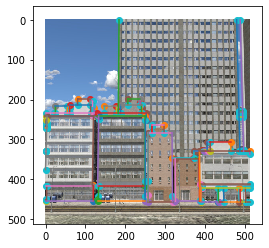

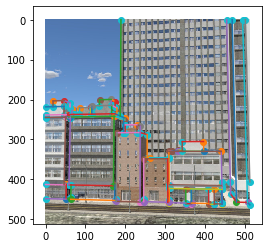

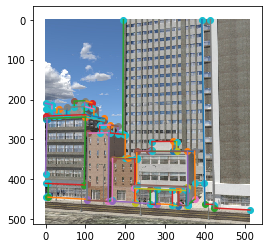

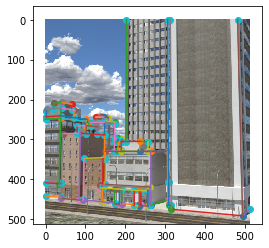

In [328]:
N_IMAGE = 4

color = plt.rcParams["axes.prop_cycle"].by_key()["color"]
fs = glob("data/00/*_0.jpg")
fs.sort()
lines = []
juncs = []
lineids = []
juncids = []
images = []
Rt = [] # world to camera matrix (for verification purpose only. DO NOT USE THIS MATRIX IN YOUR IMPLEMENTATION)
K = None # camera to pixel matrix

for fjpg in fs[:N_IMAGE]:
    fjs = fjpg.replace(".jpg", "_label.json")
    js = json.load(open(fjs))

    line = js["line"]
    lineidx = js["lineidx"]
    junc = np.array(js["junction"])
    juncidx = js["junindex"]
    K = js["K"]
    Rt.append(np.array(js["RT"]))

    junc[:, 1] *= -1
    junc *= 256
    junc += 256

    lines.append(line)
    juncs.append(junc)
    lineids.append(lineidx)
    juncids.append(juncidx)

    I = cv2.imread(fjpg)[..., ::-1]
    plt.figure()
    plt.imshow(I)
    images.append(I)
    for ln, idx in zip(line, lineidx):
        print(ln, idx, junc[ln[0], 0], junc[ln[0], 0])
        idx += len(color)
        plt.plot(
            [junc[ln[0], 0], junc[ln[1], 0]],
            [junc[ln[0], 1], junc[ln[1], 1]],
            c=color[idx % len(color)],
        )
    for jun, idx in zip(junc, juncidx):
        idx += len(color)
        print(jun, idx)
        plt.scatter(jun[0], jun[1], c=color[idx % len(color)])

# convert projection matrix (OpenGL format) to OpenCV format to avoid confusion
# the unit of the projection matrix is pixel now (OpenCV format).
# If you are still confusing, you may want to read
#     http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/OWENS/LECT9/node2.html
#     https://github.com/vvvv/VL.OpenCV/wiki/Coordinate-system-conversions-between-OpenCV,-DirectX-and-vvvv
K = np.array([[K[0][0] * 256, 0            , 256], 
              [0            , K[1][1] * 256, 256], 
              [0            , 0            , 1]])

Next, we need to extract the common junctions from multiple images and put them in a numpy array.  **You need to implement this function.**  You can refer to the demo code that visualize the dataset. Notice that T-junctions are not real junctions in 3D (their `juncidx` is -1, i.e., cyan dots in the demo images) so they should not be included.

38 common junction extracted from 4 images


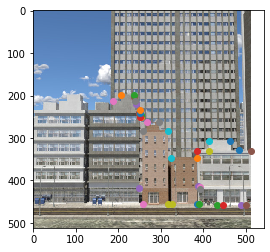

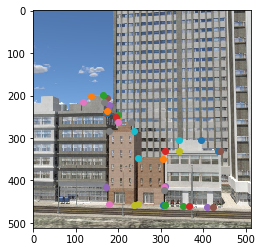

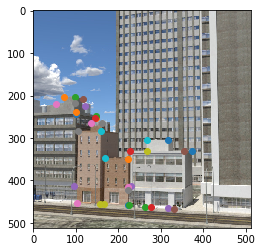

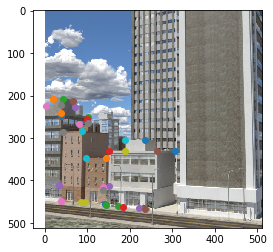

In [306]:
def extract_corresponding_junction(juncs, juncsidx):
    """Extract the common junctions from scenes

    Args:
        juncs: position of junctions
        juncsidx: global junction indices

    Returns:
        xs: coordinate of junctions of shape [N_IMAGES, N_POINTS, 2]
    """
     # YOUR CODE
     
    def find_unique_indices(juncsidx):
        unique_indices = set()
        for img_idxs in juncsidx:
            for idx in img_idxs:
                unique_indices.add(idx)
        #DO NOT INCLUDE T-JUNCTIONS
        unique_indices.remove(-1), 
        return unique_indices, len(juncsidx)
    
    junc_ids, N_IMAGES = find_unique_indices(juncsidx)
    common_junction_idxs = []
    for ids in junc_ids:
        add_id = True
        for img in range(N_IMAGES):
            if ids not in juncsidx[img]:
                add_id = False
        if add_id:
            common_junction_idxs.append(ids)
    N_POINTS = len(common_junction_idxs)
    common_junctions = np.zeros((N_IMAGES, N_POINTS, 2))
    for i, j_id in enumerate(common_junction_idxs):
        for img in range(N_IMAGES):
            for j in range(len(juncs[img])):
                if juncsidx[img][j] == j_id:
                    common_junctions[img, i] = juncs[img][j]
    return common_junctions
            
    

xs = extract_corresponding_junction(juncs, juncids)
print(xs.shape[1], "common junction extracted from", len(juncs), "images")
# visualize common junctions
color = plt.rcParams["axes.prop_cycle"].by_key()["color"]
for im_i, I in enumerate(images):
    plt.imshow(I)
    for pt_i, (y, x) in enumerate(xs[im_i]): 
        plt.scatter(y, x, c=color[pt_i % len(color)])
    plt.show()

### 1: step one in the bonus: as part of the preprocessing also maintain a list of line-segments, sets of tuples of points. If I get the chance to do this before Friday I'll take a look again.

In [329]:
def extract_corresponding_junctions_and_lines(juncs, juncsidx, lines, lineidx):
    """Extract the common junctions from scenes

    Args:
        juncs: position of junctions
        juncsidx: global junction indices
        lines: pt1, pt2: two juncidxs that represent a linesegment
    Returns:
        xs: coordinate of junctions of shape [N_IMAGES, N_POINTS, 2]
        ls: list of indices that will indicate which pairs of common junctions form lines. 
            i.e the pair 2,3 tells us that the elements two and three in the list form a line-segment.
    """
    
    return common_junctions, []

Here is the most intereseting part. **Implement Algorithm 8.1 (Factorization algorithm for multiple-view reconstruction) from the textbook.**

#### Credit to HW2 solutions for implementation of eight point algorithm

In [330]:
def im2cam(pixels, K):
    x = pixels[:, 1]
    y = pixels[:, 0]
    z = np.ones_like(x)
    pixel_coor = np.stack([x, y, z]).T
    return pixel_coor @ np.linalg.inv(K).T

def cam2im(X, K):
    _X = np.divide(X, X[:, 2, np.newaxis])
    im = _X @ K.T
    return np.array([im[:, 1], im[:, 0]]).T

def batch_kron(x0, y0, z0, x1, y1, z1):
    num_pts = len(x0)
    out = []
    for i in range(num_pts):
        out.append(np.kron([x0[i], y0[i], z0[i]], [x1[i], y1[i], z1[i]]))
    return np.array(out)

def unstack(E):
    return E.reshape(3, 3).T

def SVD(X, full_matrices=True):
    '''SVD that sorts singular values'''
    U, S, V = np.linalg.svd(X, full_matrices=full_matrices)
    indices = np.argsort(S)[::-1]
    U = U[:, indices]
    V = V[indices, :]
    return U, S, V

def skew(T):
    T = np.array(T)
    if T.shape == (3, 3):
        return np.array([T[2, 1], T[0, 2], T[1, 0]])
    else:
        return np.array([[0,     -T[2],   T[1]],
                         [T[2],  0,       -T[0]],
                         [-T[1], T[0],    0]])
    
Rz = lambda t: np.round(np.array([np.cos(t), np.sin(t), 0, -np.sin(t), np.cos(t), 0, 0, 0, 1]).reshape(3, 3))

sig = np.diag([1, 1, 0])

In [331]:
def positive_depth_solution(solutions, view0, view1):
    # return value: (R, T) that satisfy the positive depth requirements for all points
    # right now doesn't do this, but can chose between values 0-3 to find out which one works
    return solutions[1]

In [332]:
def eight_point_algorithm(view0, view1):
    # step 1: approximate essential matrix
    X = batch_kron(view0[:, 0], view0[:, 1], view0[:, 2],
                   view1[:, 0], view1[:, 1], view1[:, 2])
    U, S, V = SVD(X, full_matrices=False)
    E = unstack(V.T[:, -1])
    
    # step 2: project onto essential space
    U, S, V = SVD(E)
    
    thetas = [(np.pi/2, np.pi/2), (-np.pi/2,np.pi/2), (np.pi/2,-np.pi/2), (-np.pi/2,-np.pi/2)]
    solutions = []
    for t1, t2 in thetas:
    # step 3: recover displacement
        R = U @ Rz(t1) @ V
        T = U @ Rz(t2).T @ sig @ U.T
        solutions.append((R,T))
    # step 4: recover solution that imposes the positive depth constraint
    R, T = positive_depth_solution(solutions, view0, view1)
    
    return (R, skew(T))

In [333]:
def initialize_alphas(view1, view2, R, T):
    #Based off of formula in 8.4.3 
    alphas = []
    for x_1, x_2 in zip(view1, view2):
        #Based of 8.4.3
        alpha = -(skew(x_2) @ T).T @ skew(x_2) @ R @ x_1 
        alpha /= np.linalg.norm(skew(x_2) @ T) ** 2
        alphas.append(alpha)
    return np.array(alphas)

In [334]:
def update_alphas(points, projection_matrices):
    #Based off of formula in 8.4.4
    alphas = []
    N_IMAGES, N_POINTS = points.shape[0], points.shape[1]
    view0 = points[0]
    for j in range(1, N_POINTS + 1):
    ## for every alpha in 1,2,...N_POINTS
        term_1 = 0
        view_1 = points[0] 
        for i, (R, T) in enumerate(projection_matrices.values(), start=2):
            view_i = points[i - 1]
            term_1 += (skew(view_i[j - 1]) @ T).T @ skew(view_i[j - 1]) @ R @ view_1[j - 1] 
        term_2  = 0
        for i, (R, T) in enumerate(projection_matrices.values(), start=2):
            view_i = points[i - 1]
            term_2 += np.linalg.norm(skew(view_i[j - 1]) @ T) ** 2
        alpha_j = - term_1 / term_2
        alphas.append(alpha_j)
    return np.array(alphas)

In [335]:
def estimate_R_T(points, idx_i, alpha):
    """
    Args:
      points: coordinate of junctions of shape [N_IMAGES, N_POINTS, 3]
      idx_i : index of corresponding second-camera view
      alpha : inverse of depth values for views 1,2,....,N_POINTS    
    """
    N_POINTS = points.shape[1]
    view_1, view_i = points[0], points[idx_i - 1]
    
    P_i = np.zeros((N_POINTS * 3, 12))
    #prepare for batch kronecker product
    for j in range(N_POINTS):
        hat_j = skew(view_i[j])
        kron = np.kron(view_1[j].T , hat_j)
        P_i[j*3 :(j * 3) + 3,:] = np.concatenate((kron, alpha[j] * hat_j), axis=1)
    
    ### step 2, compute R_i_tile, T_i_tile from the singular-vector associated with the smallest singular value
    U, S, V_T = SVD(P_i, full_matrices=True)
    R_s_tilde , T_tilde = V_T[11, :9], V_T[11,9:]
    R_tilde = R_s_tilde.reshape((3,3)).T
    ## step 3, compute R_i, T_i from (8.4.1) and (8.4.2) using the SVD of R_i_tilde
    U_i, S_i, V_T_i = SVD(R_tilde, full_matrices=True)
    R_i = np.sign(np.linalg.det(U_i @ V_T_i)) * (U_i @ V_T_i)
    T_i = (np.sign(np.linalg.det(U_i @ V_T_i)) / (np.linalg.det(np.diag(S_i)) ** (1/3))) * T_tilde
    return R_i, T_i

In [336]:
def compute_reprojections(alpha, projection_matrices, first_view):
    """
    alpha: inverse of depth for every point
    projection_matrices: R,T for every image with respect to the first view
    """
    N_POINTS, N_IMAGES = alpha.shape[0], len(projection_matrices)
    x_proj = np.zeros((N_IMAGES, N_POINTS, 3))
    for v, (R, T) in enumerate(projection_matrices.values()):
        for i, x_0 in enumerate(first_view):
            proj = (1 / alpha[i]) * R @ x_0 + T
            x_proj[v, i] = proj
    return x_proj

In [337]:
def factorization_algorithm(xs, K, eps=1e-4, num_iters=1, iter_check=1):
    """Factorization algorithm for multiple-view reconstruction.
    
    Args:
      xs: coordinate of junctions of shape [N_IMAGES, N_POINTS, 2]
      K: camera projection matrix (OpenCV format)
      
    Returns:
      alpha: inversion of depth of each junction in the reference view with shape [N_POINTS]
      Rs: rotation matrix w.r.t the first view of other view with shape [N_IMAGES, 3, 3]
      Ts: translation vector w.r.t the first view of other view with shape [N_IMAGES, 3]
    """
    N_IMAGES, N_POINTS = xs.shape[0], xs.shape[1]
    xs_world = np.zeros((N_IMAGES, N_POINTS, 3))
    for i in range(N_IMAGES):
        xs_world[i] = im2cam(xs[i], K)
    
    
    #INITIALIZATION
    view1, view2 = xs_world[0], xs_world[1]
    #Compute R,T using the eight point algorithm
    R_2, T_2 = eight_point_algorithm(view1, view2)

    #compute alpha with respect to every image
    alpha =  initialize_alphas(view1, view2, R_2, T_2)
    #normalize alpha with respect to first value
    alpha = alpha / alpha[0]
    k = 0
    #initialize reprojected points to be zero before it enters the loop:
    x_proj = np.zeros_like(xs_world)
    #store the projection matrices (R, T) for right now before I concatenate them all at the end
    projection_matrices = {i: (None, None) for i in range(2, N_IMAGES + 1)}

    while np.linalg.norm(x_proj - xs_world) ** 2 > eps and k < num_iters:
        for i in range(2, N_IMAGES + 1): 
            ## for each pair of correspondences, estimate the R,T pair
            ## because the matrix involves both steps 2,3 as outlined by algorithm 8.1
            R_i, T_i = estimate_R_T(xs_world, i, alpha)
            projection_matrices[i] = R_i, T_i
        alpha = update_alphas(xs_world, projection_matrices)
        ## normalize with respect to the first value
        alpha_1 = alpha[0]
        ## update the value of the translations
        for _, T_i in projection_matrices.values():
            T_i *= alpha[0]
        alpha /= alpha[0]
        ##currently doing this to terminate the loop
        x_proj = compute_reprojections(alpha, projection_matrices, xs_world[0])
        x_proj = np.concatenate((xs_world[0][np.newaxis,:], x_proj), axis=0)
        error = np.linalg.norm(x_proj - xs_world)
        if k % iter_check == 0:
            print(f"this is the reprojection error: {error}")
            print(f"iteration num: {k}")
        k+=1
        
    R_s, T_s = np.zeros((N_IMAGES, 3, 3)), np.zeros((N_IMAGES, 3))
    for i in range(1, N_IMAGES + 1):
        if i == 1:
            R_s[i-1] = np.eye(3)
        else:
            R_i, T_i = projection_matrices[i]
            R_s[i-1] = R_i
            T_s[i-1] = T_i.T
    
    
    
    
    
    return alpha, R_s, T_s  # YOUR CODE
    
alpha, Rs, Ts = factorization_algorithm(xs, K)

this is the reprojection error: 1.2091441835412522
iteration num: 0


We provide some sanity checks. Execute them to verify you result.

In [338]:
# Verification
for i in range(N_IMAGE):
    # R should be a rotation matrix
    assert np.allclose(Rs[i] @ Rs[i].T, np.eye(3), atol=1e-4), i

    # compare with ground truth
    Rt_gt = Rt[i] @ np.linalg.inv(Rt[0])
    R_gt = Rt_gt[:3, :3]
    T_gt = Rt_gt[:3, 3]


Finally, verify the correctness of your algorithm by reprojection the junctions from other views to the reference view and **visualize them using matplotlib**.

(38, 2)


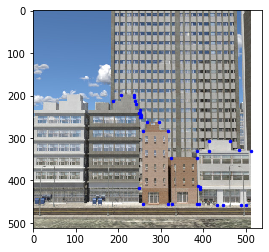

(38, 2)


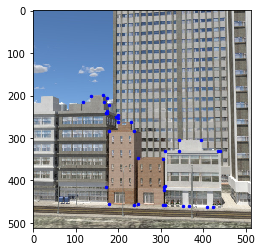

(38, 2)


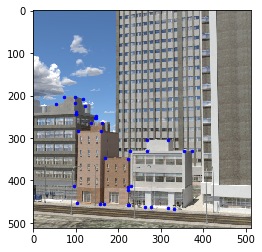

(38, 2)


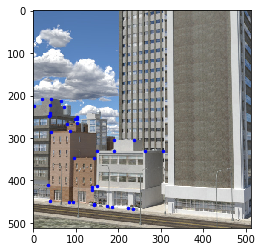

In [339]:
def visualize_reprojection(I, x, alpha, R, T, K):
    """Verify the algorithm by reproject x using R, T, and K to I. Visualization using matplotlib.
    
    Args:
      I: image (new view)
      x: coordinate of junctions in reference view
      alpha: inversion of depth of each junction in the first view with shape [N_POINTS]
      R: rotation with respect to the reference
      T: translation with respect to the reference
      K: camera projection matrix 
    """
    plt.imshow(I)
    # YOUR CODE to draw the reprojected junctions
    xs_world = im2cam(x, K)

    pview1 = []
    for i, x0 in enumerate(xs_world):
        proj = R @ x0 / alpha[i] + T
        pview1.append(proj)
        
    pview1 = np.squeeze(pview1)
    pcam1 = cam2im(pview1, K)
    print(pcam1.shape)
    plt.scatter(pcam1[:, 0], pcam1[:, 1], c='blue', s=6)
    plt.show()

for i in range(N_IMAGE):
    visualize_reprojection(images[i], xs[0], alpha, Rs[i], Ts[i], K)

*Bonus Question (20%):* Modify the algorithm 8.1 so that it is able to handle the line in the SceneCity dataset. **Write down the pseudo-code.**

We know that to handle a line we need two points, with that information we have all the information necessary to handle lines in the the SceneCity dataset.

Algorithm multiview_reconstruction with lines:

1: as part of the preprocessing-step of finding the corresponding junctions, maintain a list of all lines as a set of tuples (p1, p2), where (p1,p2) indicates to draw a line between points p1 and p2 for all of the images

2: compute alpha, R_s, T_s with the multiview reconstruction as outlined in section 8.1 in the textbook.

3: compute the reprojected points for every image

4: for every line (p1, p2) in our list of lines: plot the line between $\pi_{i}(p1)$ and $\pi_{i}(p2)$, the reprojected pairs of tuples, for every image i = 2,...,m.

*Bonus Question (100%):* Implement your algorithm and verify its correctness.